# 방범용CCTV 위치와 인구 데이터분석
- 목표 : CCTV 수와 인구대비 CCTV 비율을 파악
- 인구대비 CCTV의 평균치를 확인하고 그로부터 CCTV가 과하게 부족한 구를 확인

In [1]:
import pandas as pd
file_path = './ref/부산광역시방범용 CCTV 정보.csv'
CCTV = pd.read_csv(file_path, encoding = 'EUC-KR')
CCTV.head()

,CCTV 명칭,CCTV 좌표,CCTV 그룹
0,(10차)강서-10-232-1죽동동381가락송산마을(고1),"10.1.11.186:0:0:0:0:0:0,10.1.11.186:9400:",강서-10차
1,(10차)강서-10-232-2죽동동381가락송산마을(고2),"10.1.11.186:0:0:0:0:0:0,10.1.11.186:9400:",강서-10차
2,(10차)강서-10-233-1대저2동3147근린공원(고1),"10.1.11.186:0:0:0:0:0:0,10.1.11.186:9400:",강서-10차
3,(10차)강서-10-233-2대저2동3147근린공원(고2),"10.1.11.186:0:0:0:0:0:0,10.1.11.186:9400:",강서-10차
4,(10차)강서-10-235-2대저2동2041-40덕두시장,"10.1.11.186:0:0:0:0:0:0,10.1.11.186:9400:",강서-10차


In [2]:
CCTV.sample(10)

,CCTV 명칭,CCTV 좌표,CCTV 그룹
2313,0304-14-구포1동_1267_유림빌라_앞_고1,"10.1.11.224:0:0:0:0:0:0,10.1.11.224:9400:",북구-14차
2655,0145-6-모라로_110번길_60_모라어린이집_고2,"10.1.11.206:0:0:0:0:0:0,10.1.11.206:9400:",사상-11차
1907,15-0002_안남로_31_파리바게뜨_부산낙민점,"10.1.10.130:0:0:0:0:0:0,10.1.10.130:9401:",동래-15차
3215,시02-0018_장림2동_두송로47_장림여중_후문,"10.1.10.111:0:0:0:0:0:0,10.1.10.111:9400:",사하-2차
938,(5차)_정관면_용수리_1364_신정중학교와_롯데개슬,"10.1.11.83:0:0:0:0:0:0,10.1.11.83:9400:",기장-5차
2425,0066-4-금곡동_99-1_금곡초등학교앞사거리_고3,"10.1.10.83:0:0:0:0:0:0,10.1.10.83:9400:",북구-4차
4991,0106-6-남포동-부산종합관광안내소_옆_고1,"10.1.11.189:0:0:0:0:0:0,10.1.11.189:9400:",중구-12차
1841,(11차)_쇠미로221번길36-10_성우빌라_앞_고1,"10.1.11.200:0:0:0:0:0:0,10.1.11.200:9400:",동래-11차
1425,(9차)_0240_문현동_1247_경동리인아파트_뒷길,"10.1.11.159:0:0:0:0:0:0,10.1.11.159:9400:",남구-9차
3334,시06-0146_하단2동_하신번영로434-6_커뮤니티가든,"10.1.11.51:0:0:0:0:0:0,10.1.11.51:9400:",사하-6차


In [3]:
cctv = CCTV.rename(columns = {'CCTV 그룹' : 'local'})['local']

In [4]:
# 방법1
cctv = cctv.apply(lambda x : x.split('-')[0])

# 방법2
# local_list = []
# for v in cctv:
#     local_list.append(v.split('-')[0])
# cctv = pd.Series(local_list)

# 방법3
# cctv = cctv.str.extract(r'(\D+)-')[0]

cctv = cctv.value_counts()
cctv = cctv.reset_index()

In [5]:
cctv.sample(3)

,local,count
12,남구,351
3,동래,404
7,영도,381


- 행정동별 연령별 인구현황
- https://jumin.mois.go.kr/ageStatMonth.do

In [6]:
import pandas as pd
import warnings
warnings.simplefilter("ignore", UserWarning)

file_path2 = "./ref/연령별인구현황월간202306.xlsx"
ori = pd.read_excel(file_path2,sheet_name="연령별인구현황",skiprows=3)
ori.head(2)

,행정기관코드,행정기관,총 인구수,연령구간인구수,0~9세,10~19세,20~29세,30~39세,40~49세,50~59세,...,10~19세.2,20~29세.2,30~39세.2,40~49세.2,50~59세.2,60~69세.2,70~79세.2,80~89세.2,90~99세.2,100세 이상.2
0,2600000000,부산광역시,"3,306,993","3,306,993","200,627","264,771","386,558","393,792","489,807","539,964",...,"128,872","187,837","191,071","242,526","276,337","296,378","172,706","87,000","13,119",384
1,2611000000,부산광역시 중구,"39,311","39,311",931,"1,773","5,638","4,310","4,582","6,423",...,914,"2,964","2,037","2,096","3,078","4,109","2,877","1,532",251,15


In [21]:
data = ori[['행정기관','총 인구수']]
data.columns = ["local","population"]
data = data.loc[1:]
data['local'] = data['local'].apply(lambda x: x.replace("부산광역시 ","").strip())
data = data.reset_index(drop=True) # drop = True는 기존 인덱스를 삭제하고 새롭게 부여
data

,local,population
0,중구,"39,311"
1,서구,"104,449"
2,동구,"86,809"
3,영도구,"107,006"
4,부산진구,"357,475"
5,동래구,"272,590"
6,남구,"255,786"
7,북구,"276,684"
8,해운대구,"383,355"
9,사하구,"300,922"


In [8]:
# cctv = cctv.sort_values(by="local", ascending=True)
# data = data.sort_values(by="local", ascending=True)
# 방법 1
# total
# total.columns = ['local','count','localx','population']
# total = total.drop(columns=['localx'])
# total = pd.concat([cctv,data],axis=1)
# 방법 2
# total = total.drop(total.columns[2],axis=1) # 이름이 같을경우 인덱스가 사용안됨.
# total

In [9]:
# 공백 조심 data["local"] = data["local"].apply(lambda x: len(x))
data["local"] = data["local"].apply(lambda x: x.replace("구","").replace("군","").replace("부산진","진구").strip() if len(x.strip())>2 else x.strip())
data

,local,population
0,중구,"39,311"
1,서구,"104,449"
2,동구,"86,809"
3,영도,"107,006"
4,진구,"357,475"
5,동래,"272,590"
6,남구,"255,786"
7,북구,"276,684"
8,해운대,"383,355"
9,사하,"300,922"


In [10]:
total = pd.merge(cctv, data, on = 'local')
total['population'] = total['population'].str.replace(",","").astype(int)
total = total.sort_values(by = "population", ascending = False)
total = total.set_index('local')
total

,count,population
local,,
해운대,418,383355
진구,395,357475
사하,431,300922
북구,403,276684
동래,404,272590
남구,351,255786
금정,403,218711
사상,422,203029
연제,377,202919


Text(0.2, 0.4, '한글')

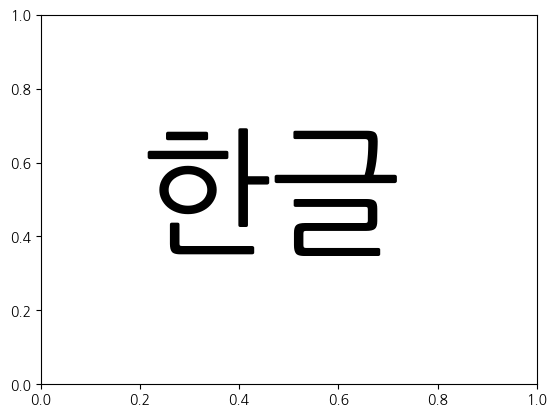

In [11]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm

# 리눅스용 폰트 경로 설정
plt.rc('font', family = 'NanumGothic')
plt.text(0.2, 0.4, '한글', size = 100)

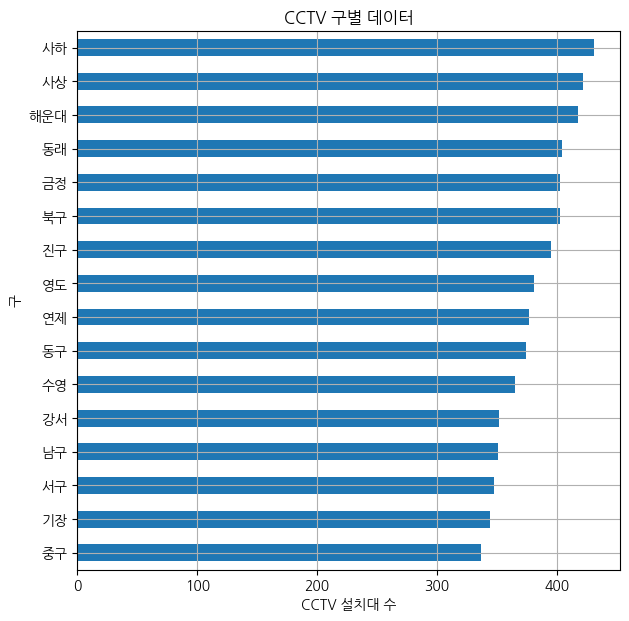

In [16]:
# plt.figure()
total['count'].sort_values().plot(kind="barh", grid=True, figsize=(7,7), ylabel="구")

plt.title("CCTV 구별 데이터")
plt.xlabel("CCTV 설치대 수")
plt.show()

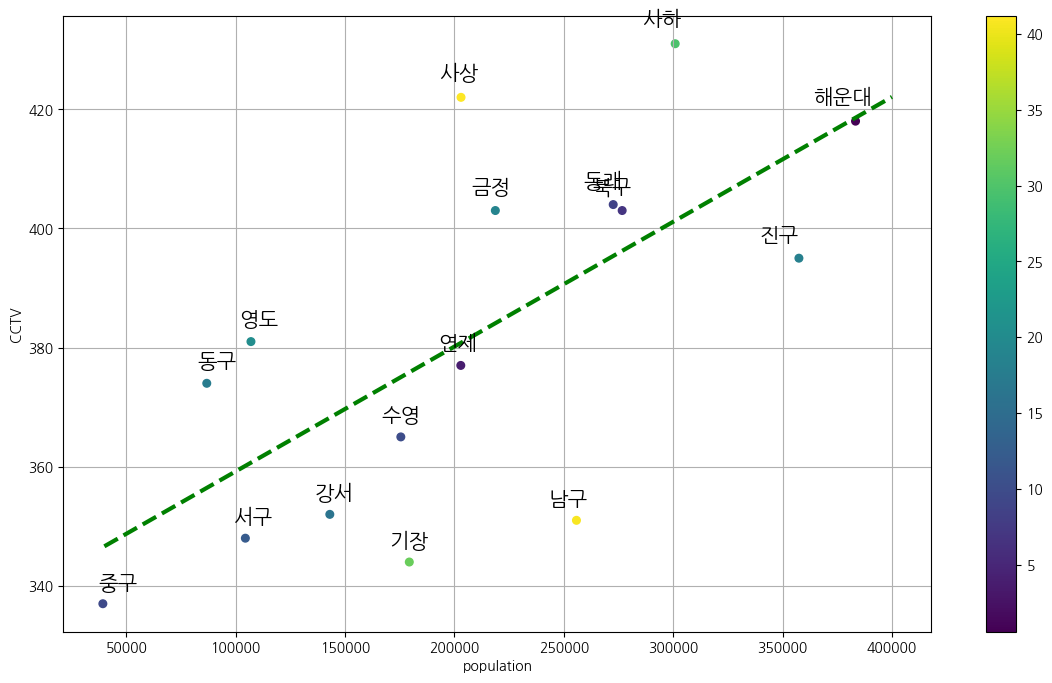

In [17]:
import numpy as np
fp1 = np.polyfit(total['population'], total['count'], 1)
f1 = np.poly1d(fp1)
fx = np.linspace(40000, 400000, 10)
plt.figure(figsize = (14, 8))
plt.plot(fx, f1(fx), ls = 'dashed', lw = 3, color = 'g')

# 오차
total['err'] = np.abs(total['count'] - f1(total['population']))

plt.scatter(total['population'], total['count'], s = 30, c = total['err'])
plt.xlabel('population')
plt.ylabel('CCTV')
plt.plot()

# 점마다 각 동의 이름을 부여
for i in range(len(total['population'])):
    plt.text(total['population'].iloc[i] * 0.95, total['count'].iloc[i] * 1.007, total.index[i], fontsize = 15)
plt.grid()
plt.colorbar()
plt.show()

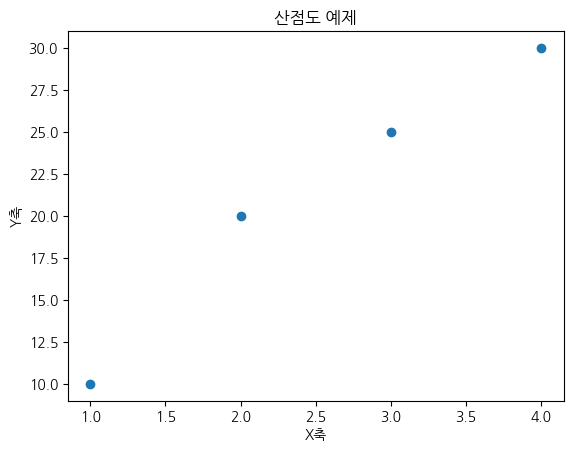

In [19]:
import matplotlib.pyplot as plt

# 데이터 정의
x = [1, 2, 3, 4]
y = [10, 20, 25, 30]

# 산점도 그리기
plt.scatter(x, y)

# 제목과 축 레이블 추가
plt.title("산점도 예제")
plt.xlabel("X축")
plt.ylabel("Y축")

# 그래프 표시
plt.show()